In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"fraudTest.csv", index_col=0)
# Dropping index column by mentioning "index_col=0"

In [3]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-null  i

In [5]:
# No NUll Value are there in this dataset

In [6]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [7]:
df.select_dtypes(include='object').describe()

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719
unique,226976,693,14,341,471,2,924,849,50,478,910,555719
top,15-12-2020 21:26,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,23-03-1977,2da90c7d74bd46a0caf3777415b3ebd3
freq,16,1859,56370,11443,12146,304886,1474,2423,40393,4119,2408,1


In [8]:
# trans_date_trans_time
# dob  
#  --> Above columns are respected to date and time but they are in object datatype

In [9]:
# Converting "trans_date_trans_time" column's dtype to DATETIME ( Regularizing )
df.trans_date_trans_time = pd.to_datetime(df.trans_date_trans_time, utc=True, dayfirst=True)

In [10]:
# Converting "DOB" column's dtype to DATETIME ( Regularizing )
df.dob = pd.to_datetime(df.dob, utc=True, dayfirst=True)

In [11]:
df[['trans_date_trans_time', 'dob']].dtypes

trans_date_trans_time    datetime64[ns, UTC]
dob                      datetime64[ns, UTC]
dtype: object

In [12]:
df[['trans_date_trans_time', 'dob']].head(2)

,trans_date_trans_time,dob
0,2020-06-21 12:14:00+00:00,1968-03-19 00:00:00+00:00
1,2020-06-21 12:14:00+00:00,1990-01-17 00:00:00+00:00


In [13]:
# Calculating Age
df['Age'] = df.trans_date_trans_time.dt.year - df.dob.dt.year

In [14]:
df[['Age']].head(2)

,Age
0,52
1,30


In [15]:
# df.trans_date_trans_time.dt.date  ------> returns date
df['time'] = df.trans_date_trans_time.dt.time
df['day'] = df.trans_date_trans_time.dt.day_name()

In [16]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0         2020-06
1         2020-06
2         2020-06
3         2020-06
4         2020-06
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 555719, dtype: period[M]

In [17]:
df['year_month'] = df['year_month'].astype(dtype='object')

In [18]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'Age', 'time', 'day', 'year_month'],
      dtype='object')

### Visualizations and analysis

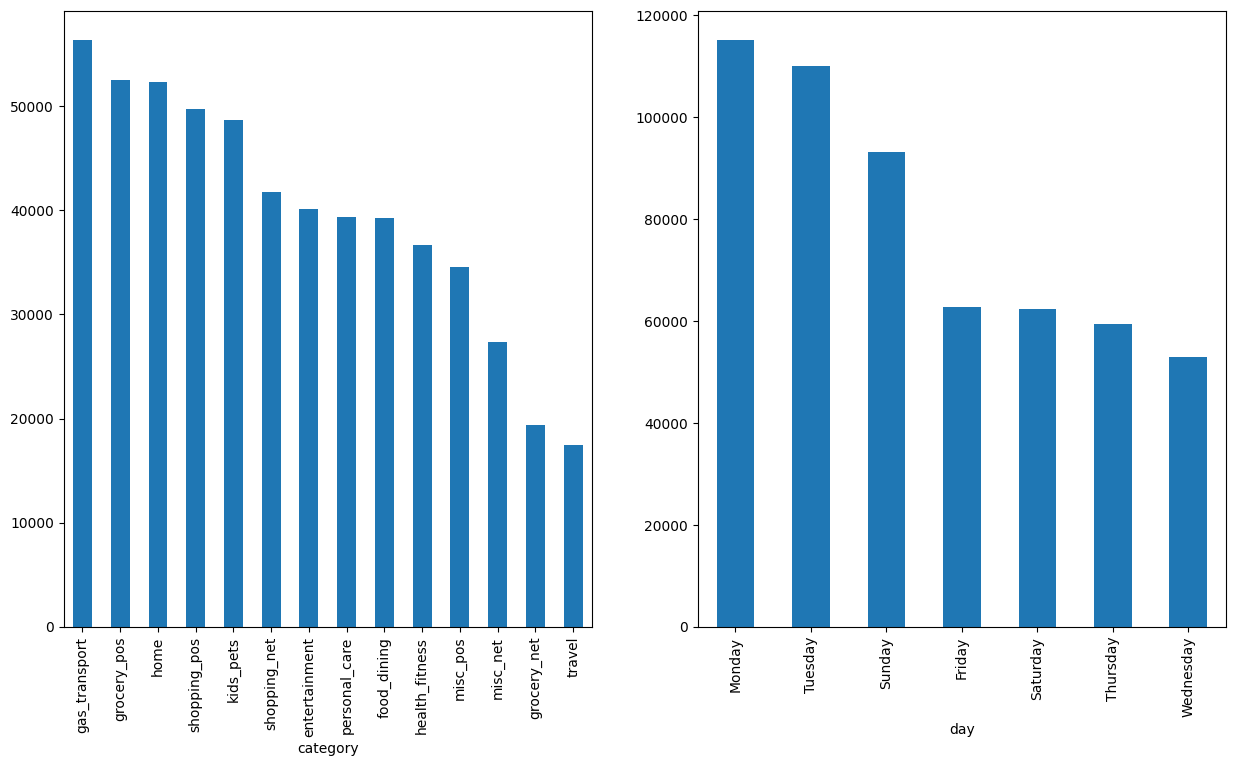

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['day'].value_counts().plot.bar();

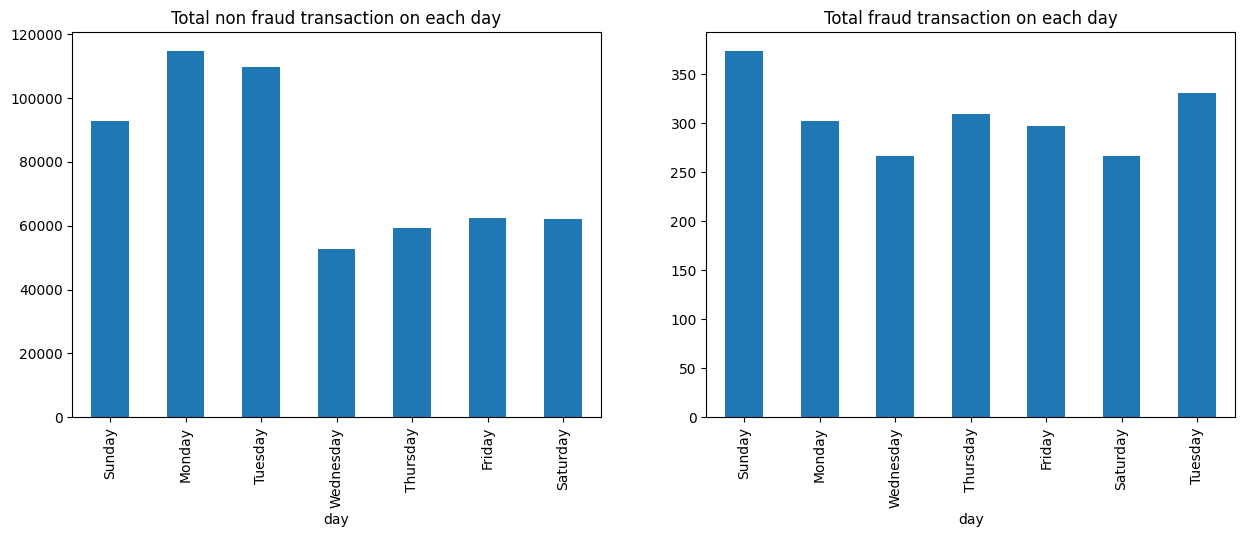

In [20]:
# plot barplots of non fraud transaction in each day
## plot barplots of  fraud transaction in each day
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Total non fraud transaction on each day')
df[df.is_fraud==0]['day'].value_counts(sort=False).plot.bar();
plt.subplot(1,2,2)
plt.title('Total fraud transaction on each day')
df[df.is_fraud==1]['day'].value_counts(sort=False).plot.bar();

In [21]:
# df['year_month'].value_counts(sort=False)

<Axes: title={'center': 'Total transaction on Month-Wise'}, xlabel='year_month', ylabel='count'>

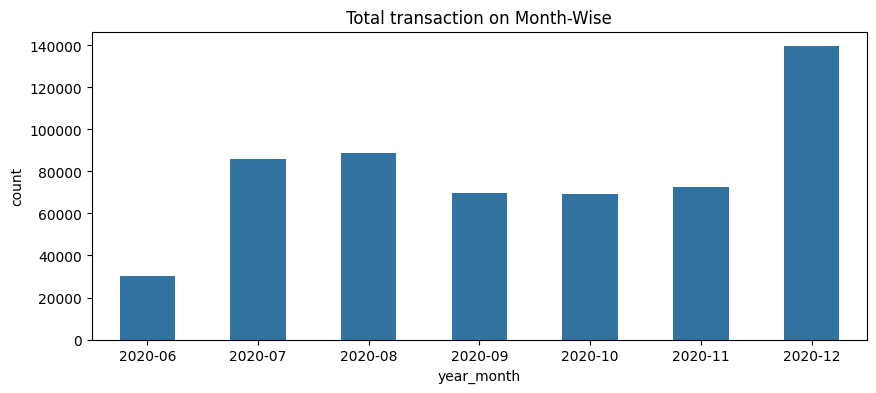

In [22]:
plt.figure(figsize=(10,4))
plt.title('Total transaction on Month-Wise')
sns.barplot(df['year_month'].value_counts(sort=False), width=0.5)

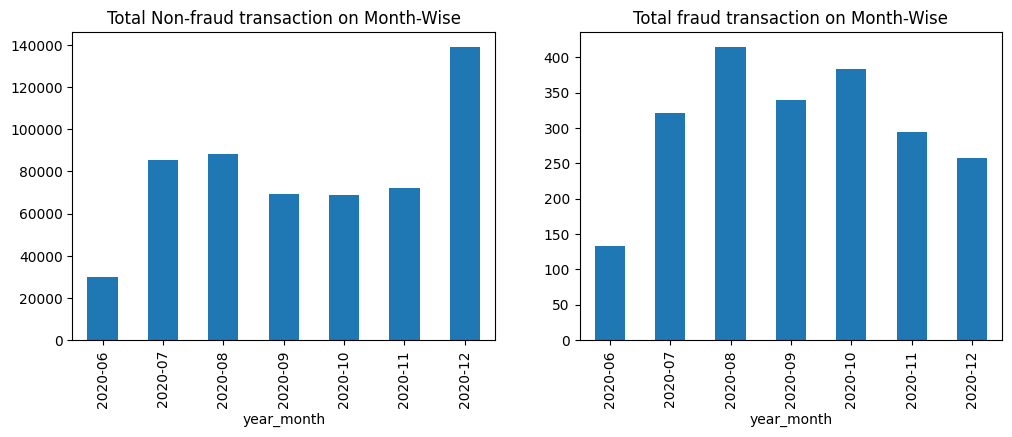

In [23]:
# month vs fraud and non fraud
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Total Non-fraud transaction on Month-Wise')
df[df.is_fraud==0]['year_month'].value_counts(sort=False).plot.bar();

plt.subplot(1,2,2)
plt.title('Total fraud transaction on Month-Wise')
df[df.is_fraud==1]['year_month'].value_counts(sort=False).plot.bar();

In [24]:
#  FRAUD Transactions count is higher in August and lower in June in 2020

In [25]:
# df.category.value_counts().plot(kind='bar')
# df.day.value_counts().plot(kind='bar')

In [26]:
df.is_fraud.value_counts(normalize=True)*100

is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64

In [27]:
# pd.concat(
# [df['amt'].describe(percentiles = [0.5,0.95,0.999])\
# .reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amount Distribution'}),
# df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
# .reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amount Distribution'}),
# df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
# .reset_index(drop = 1).rename(columns={'amt':'Fraud Amount Distribution'})],
# axis=1
# )

In [28]:
pd.concat(
    [df[['amt']].reset_index(drop=1).rename(columns={'amt':'Overall Amount Distribution'}),
    df[df.is_fraud==0][['amt']].reset_index(drop=1).rename(columns={'amt':'Non Fraud Amount Distribution'}),
    df[df.is_fraud==1][['amt']].reset_index(drop=1).rename(columns={'amt':'Fraud Amount Distribution'})],
    axis = 1).describe()

,Overall Amount Distribution,Non Fraud Amount Distribution,Fraud Amount Distribution
count,555719.000000,553574.000000,2145.000000
mean,69.392810,67.614408,528.356494
std,156.745941,152.471931,392.747594
min,1.000000,1.000000,1.780000
25%,9.630000,9.600000,214.510000
50%,47.290000,47.150000,371.940000
75%,83.010000,82.620000,907.770000
max,22768.110000,22768.110000,1320.920000


In [29]:
# df[df.is_fraud==0][['amt']].plot(kind='bar')

In [30]:
# df[df.is_fraud==1][['amt']].plot(kind='bar')

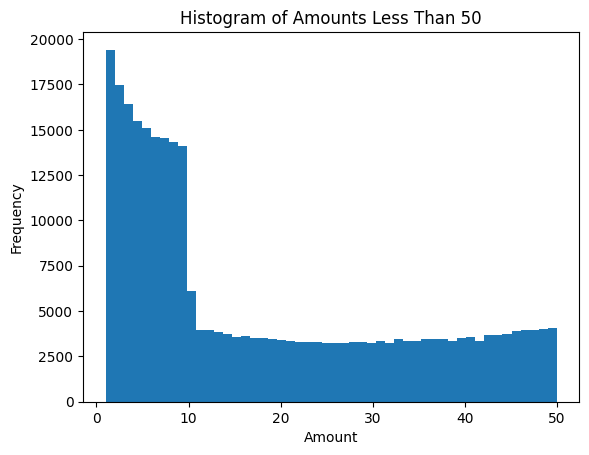

In [31]:
plt.hist(x=df[df['amt']<50]['amt'], bins=50);
plt.title('Histogram of Amounts Less Than 50')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

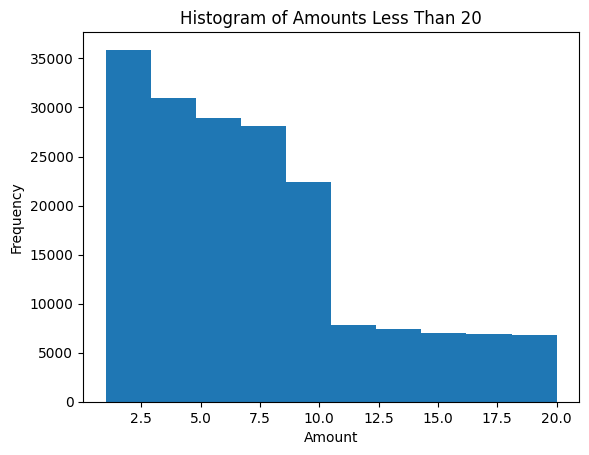

In [32]:
plt.hist(x=df[df['amt']<=20]['amt'], bins=10);
plt.title('Histogram of Amounts Less Than 20')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

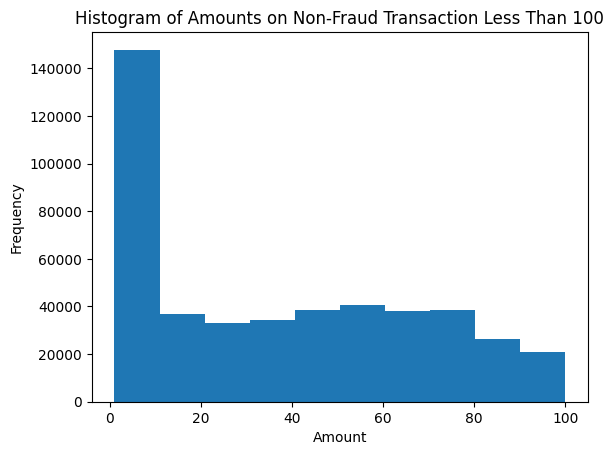

In [33]:
plt.hist(x=df[(df.is_fraud==0) & (df.amt<=100) ]['amt']);
plt.title('Histogram of Amounts on Non-Fraud Transaction Less Than 100')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

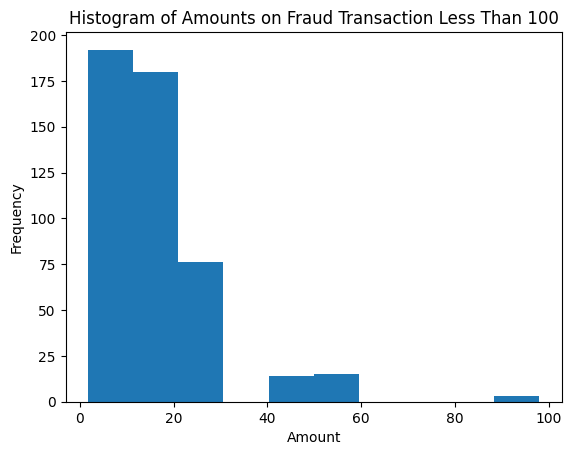

In [34]:
plt.hist(x=df[(df.is_fraud==1) & (df.amt<=100) ]['amt']);
plt.title('Histogram of Amounts on Fraud Transaction Less Than 100')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

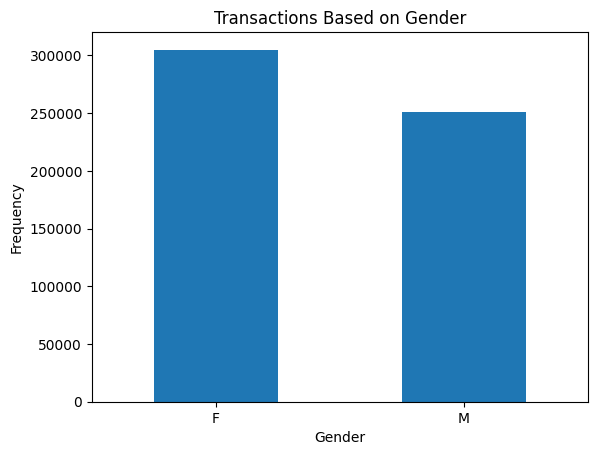

In [35]:
df.gender.value_counts().plot(kind='bar')
plt.title('Transactions Based on Gender')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

<Axes: title={'center': 'Total number of Fraud Transactions done Genderwise'}, xlabel='gender'>

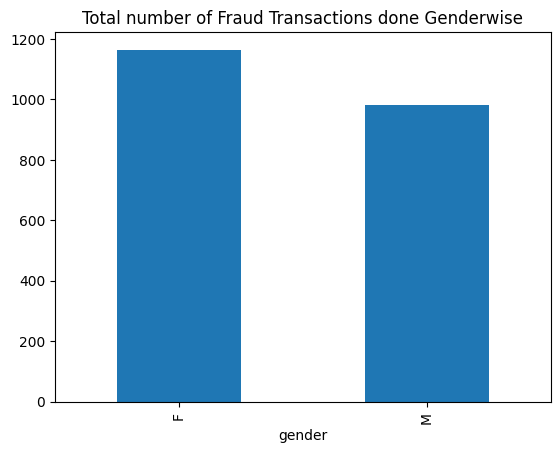

In [36]:
# Total number of Fraud Transactions done Genderwise
plt.title('Total number of Fraud Transactions done Genderwise')
df[(df.is_fraud==1)]['gender'].value_counts().plot.bar()

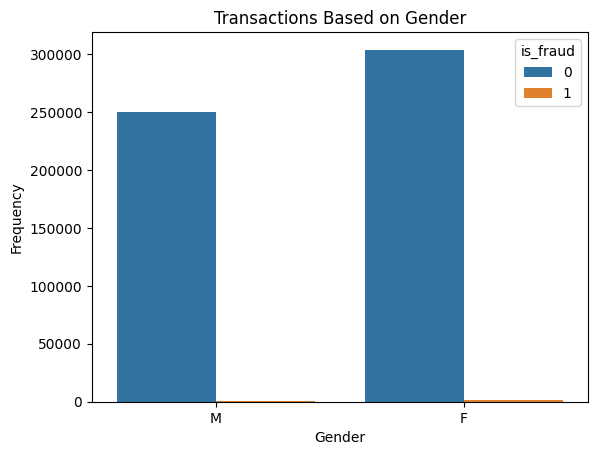

In [37]:
sns.countplot(data=df, x='gender', hue='is_fraud')
plt.title('Transactions Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [38]:
pd.crosstab(df['gender'], df['is_fraud'])

is_fraud,0,1
gender,,
F,303722,1164
M,249852,981


<Axes: >

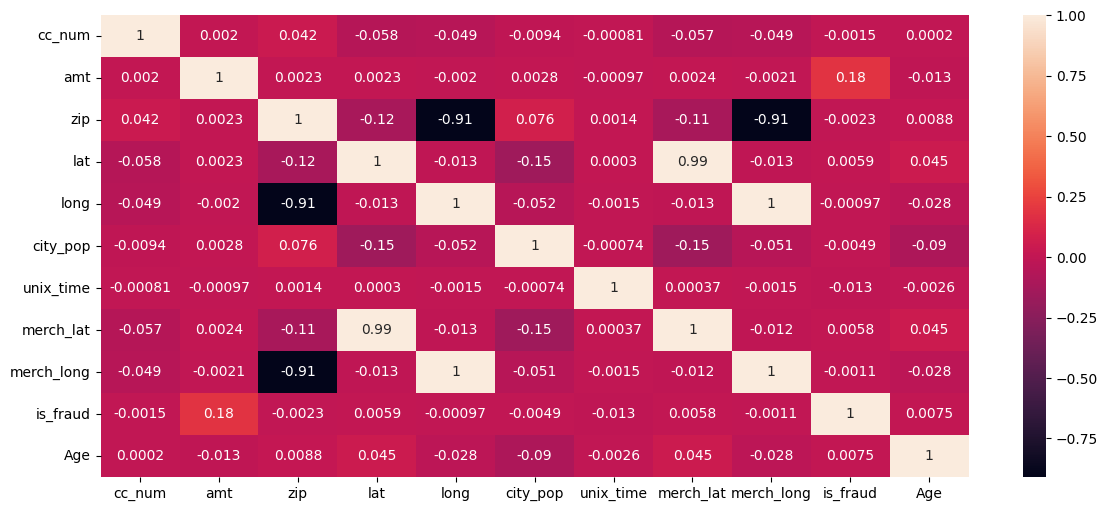

In [39]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(numeric_only=True), annot=True,)

In [40]:
# pd.crosstab(df['is_fraud'], df['category']).reset_index().iloc[:,1:]
pd.crosstab(df['category'], df['is_fraud'])

is_fraud,0,1
category,,
entertainment,40045,59
food_dining,39214,54
gas_transport,56216,154
grocery_net,19385,41
grocery_pos,52068,485
health_fitness,36622,52
home,52278,67
kids_pets,48627,65
misc_net,27100,267


In [41]:
job_frq = df['job'].value_counts(normalize=True).reset_index()

In [42]:
job_frq.columns = ['job', "frequency"]

In [43]:
job_frq

,job,frequency
0,Film/video editor,0.007412
1,Exhibition designer,0.007140
2,"Surveyor, land/geomatics",0.006759
3,Naval architect,0.006748
4,"Designer, ceramics/pottery",0.006232
...,...,...
473,Estate manager/land agent,0.000351
474,"Engineer, civil (consulting)",0.000349
475,Operational investment banker,0.000020
476,Software engineer,0.000020


### Feature Selection

In [44]:
# if a categorical clm has more 
# rule:when a categorical col has  upto 7 levels then we can do one hot encoding
# more than that perform label encoding / frequency encoding

In [45]:
df.drop(columns=['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'zip'], axis=1, inplace=True)

In [46]:
df.drop(columns=['dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'time'], axis=1, inplace=True)

In [47]:
# df.drop(columns=['lat', 'long'], axis=1, inplace=True)

In [48]:
df.head(2)

,merchant,category,amt,gender,state,lat,long,city_pop,job,is_fraud,Age,day,year_month
0,fraud_Kirlin and Sons,personal_care,2.86,M,SC,33.9659,-80.9355,333497,Mechanical engineer,0,52,Sunday,2020-06
1,fraud_Sporer-Keebler,personal_care,29.84,F,UT,40.3207,-110.4360,302,"Sales professional, IT",0,30,Sunday,2020-06


In [49]:
# 50 states are there
# 478 jobs 

In [50]:
df_str=df.select_dtypes(include='object')

In [51]:
df_str.describe()

,merchant,category,gender,state,job,day,year_month
count,555719,555719,555719,555719,555719,555719,555719
unique,693,14,2,50,478,7,7
top,fraud_Kilback LLC,gas_transport,F,TX,Film/video editor,Monday,2020-12
freq,1859,56370,304886,40393,4119,115136,139538


####  Performing Label encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le=LabelEncoder()

In [54]:
df_str.category = le.fit_transform(df_str.category)

In [55]:
df_str.category.head(2)

0    10
1    10
Name: category, dtype: int32

###  Performing One Heart Encoding
-  Day, Gender

In [56]:
df_str.drop(columns=['day', 'gender', 'year_month'], inplace=True)

In [57]:
day_ohe = pd.get_dummies(df.day, dtype=int)
gen_ohe = pd.get_dummies(df.gender, prefix='Gender', dtype=int)
mon_ohe = pd.get_dummies(df.year_month, prefix='month', dtype=int)

In [58]:
df_str.head(2)

,merchant,category,state,job
0,fraud_Kirlin and Sons,10,SC,Mechanical engineer
1,fraud_Sporer-Keebler,10,UT,"Sales professional, IT"


###  Performing Frequency encoding

In [59]:
df_str.merchant.replace(df_str.merchant.value_counts(normalize=True), inplace=True)
df_str.job.replace(df_str.job.value_counts(normalize=True), inplace=True)
df_str.state.replace(df_str.state.value_counts(normalize=True), inplace=True)

In [60]:
df_str.head(2)

,merchant,category,state,job
0,0.001324,10,0.022567,0.004373
1,0.001413,10,0.008382,0.004562


In [61]:
# merging 3 ohe DF's and le df_str
df_str_fin = pd.concat([df_str, day_ohe, gen_ohe, mon_ohe], axis=1)

In [62]:
df_str_fin.head(2)

,merchant,category,state,job,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Gender_F,Gender_M,month_2020-06,month_2020-07,month_2020-08,month_2020-09,month_2020-10,month_2020-11,month_2020-12
0,0.001324,10,0.022567,0.004373,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
1,0.001413,10,0.008382,0.004562,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0


<Axes: >

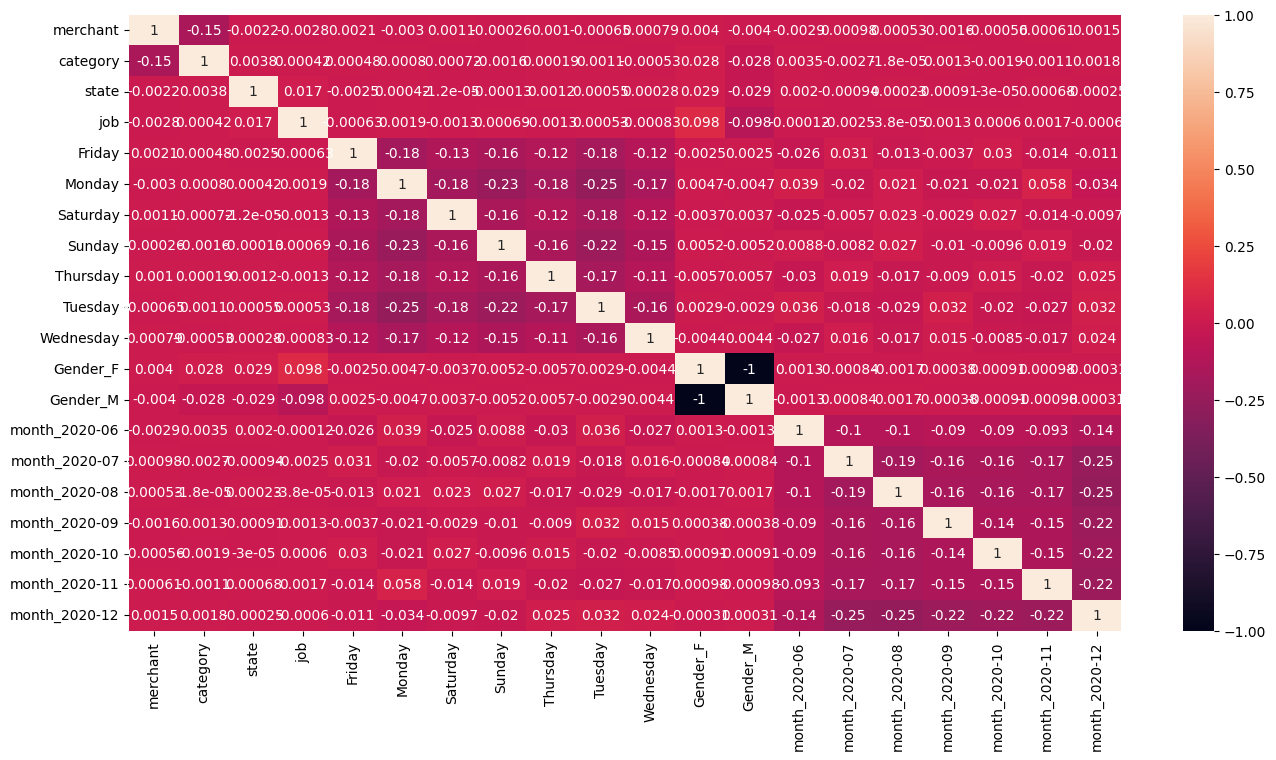

In [63]:
plt.figure(figsize=(16,8))
sns.heatmap(df_str_fin.corr(), annot=True)

### Numerical data

In [64]:
df_num=df.select_dtypes(include=['int64', 'float64'])

In [65]:
df_num.drop(columns='is_fraud', axis=1, inplace=True)

In [66]:
# from sklearn.preprocessing import MinMaxScaler
# mn = MinMaxScaler()
# df_num['mn']=mn.fit_transform(df[['amt']])

In [67]:
from sklearn.preprocessing import minmax_scale

In [68]:
mn=minmax_scale(X=df_num,axis=0)

In [69]:
df_mn=pd.DataFrame(data=mn,columns=df_num.columns)

In [70]:
df_mn

,amt,lat,long,city_pop
0,0.000082,0.305255,0.867121,0.114727
1,0.001267,0.444423,0.565239,0.000096
2,0.001769,0.452136,0.942836,0.011860
3,0.002594,0.187080,0.868312,0.018834
4,0.000096,0.530537,0.825355,0.000379
...,...,...,...,...
555714,0.001879,0.448199,0.755010,0.000171
555715,0.004868,0.197364,0.718694,0.009879
555716,0.003772,0.573103,0.478609,0.001260
555717,0.000307,0.538697,0.503704,0.000036


In [71]:
x = pd.concat([df_str_fin, df_mn], axis=1)

In [72]:
x

,merchant,category,state,job,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,...,month_2020-07,month_2020-08,month_2020-09,month_2020-10,month_2020-11,month_2020-12,amt,lat,long,city_pop
0,0.001324,10,0.022567,0.004373,0,0,0,1,0,0,...,0,0,0,0,0,0,0.000082,0.305255,0.867121,0.114727
1,0.001413,10,0.008382,0.004562,0,0,0,1,0,0,...,0,0,0,0,0,0,0.001267,0.444423,0.565239,0.000096
2,0.001359,5,0.064633,0.004655,0,0,0,1,0,0,...,0,0,0,0,0,0,0.001769,0.452136,0.942836,0.011860
3,0.001279,9,0.032578,0.001193,0,0,0,1,0,0,...,0,0,0,0,0,0,0.002594,0.187080,0.868312,0.018834
4,0.000666,13,0.035397,0.001603,0,0,0,1,0,0,...,0,0,0,0,0,0,0.000096,0.530537,0.825355,0.000379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.001362,5,0.029693,0.003057,0,0,0,0,1,0,...,0,0,0,0,0,1,0.001879,0.448199,0.755010,0.000171
555715,0.001810,7,0.072686,0.003102,0,0,0,0,1,0,...,0,0,0,0,0,1,0.004868,0.197364,0.718694,0.009879
555716,0.001877,7,0.014605,0.004668,0,0,0,0,1,0,...,0,0,0,0,0,1,0.003772,0.573103,0.478609,0.001260
555717,0.000623,13,0.004481,0.001589,0,0,0,0,1,0,...,0,0,0,0,0,1,0.000307,0.538697,0.503704,0.000036


In [73]:
y= df[['is_fraud']]

In [74]:
y

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
555714,0
555715,0
555716,0
555717,0


### Logistic Regression

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [77]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((389003, 24), (389003, 1), (166716, 24), (166716, 1))

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logreg = LogisticRegression()

In [80]:
logreg1=logreg.fit(X_train, y_train)

In [81]:
y_train_pred = logreg1.predict(X_train)
y_test_pred = logreg1.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [83]:
#  ON TRAINIG DATA 
# print(confusion_matrix(y_train, y_train_pred))
# print(classification_report(y_train, y_train_pred))

In [84]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[166064     12]
 [   640      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.00      0.00      0.00       640

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716



In [85]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_test_pred)
acc

0.9960891576093477

In [86]:
# Accuracy Score without month feature     0.9960831593848221
# Accuracy after month feature             0.9960891576093477   ---> Accuracy is slightly increased